In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSITUTION_ID = "ins_109508"

In [6]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [8]:
INSTITUTION_ID = "ins_109508"

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
create_tkn_response

{'public_token': 'public-sandbox-86bbb53b-dd9e-49db-b84e-83c664048480',
 'request_id': 'pwhHlnhHinC1rSk'}

### 3. Exchange the public token for an access token

In [9]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [14]:
account_info = client.Accounts.get(access_token)

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [15]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)


### 2. Print the categories for each transaction

In [26]:
for category in transaction_response['transactions']:
        new_category = category['category'][0]
        print(json.dumps(f"Categories in each transaction: {category['category']}", indent = 4))

"Categories in each transaction: ['Travel', 'Car Service', 'Ride Share']"
"Categories in each transaction: ['Food and Drink', 'Restaurants']"
"Categories in each transaction: ['Payment']"
"Categories in each transaction: ['Food and Drink', 'Restaurants']"
"Categories in each transaction: ['Shops', 'Sporting Goods']"
"Categories in each transaction: ['Payment', 'Credit Card']"
"Categories in each transaction: ['Travel', 'Car Service', 'Ride Share']"
"Categories in each transaction: ['Transfer', 'Debit']"
"Categories in each transaction: ['Transfer', 'Deposit']"
"Categories in each transaction: ['Recreation', 'Gyms and Fitness Centers']"
"Categories in each transaction: ['Travel', 'Airlines and Aviation Services']"
"Categories in each transaction: ['Food and Drink', 'Restaurants']"
"Categories in each transaction: ['Food and Drink', 'Restaurants', 'Coffee Shop']"
"Categories in each transaction: ['Food and Drink', 'Restaurants']"
"Categories in each transaction: ['Transfer', 'Credit']"
"

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [33]:
new_df = pd.DataFrame(transaction_response['transactions'], columns=["date", "name", "amount", "category"]) 
new_df['category'] = new_df['category'].str.get(0)
new_df.head()

,date,name,amount,category
0,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
1,2019-09-28,Tectra Inc,500.00,Food and Drink
2,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2019-09-27,KFC,500.00,Food and Drink
4,2019-09-27,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [40]:
new_df['date']= pd.to_datetime(new_df['date']) 
df3 = new_df.set_index('date')
columns = ["Name", "Amount", "Category"]
df3.columns = columns
df3.head()

,Name,Amount,Category
date,,,
2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
2019-09-28,Tectra Inc,500.00,Food and Drink
2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2019-09-27,KFC,500.00,Food and Drink
2019-09-27,Madison Bicycle Shop,500.00,Shops


In [42]:
df3.dtypes

Name         object
Amount      float64
Category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [37]:
transaction_response = client.Income.get(access_token)
transaction_response["income"]

{'income_streams': [{'confidence': 0.99,
   'days': 690,
   'monthly_income': 500,
   'name': 'UNITED AIRLINES'}],
 'last_year_income': 6000,
 'last_year_income_before_tax': 7285,
 'max_number_of_overlapping_income_streams': 1,
 'number_of_income_streams': 1,
 'projected_yearly_income': 6085,
 'projected_yearly_income_before_tax': 7389}

In [55]:
#Last Year's Gross Income
last_year_income=transaction_response['income']['last_year_income_before_tax']
print(last_year_income)

7285


In [54]:
#Current Monthly Income
monthly_income=transaction_response['income']['income_streams'][0]['monthly_income']
print(monthly_income)

500


In [53]:
#Projected Yearly Income
projected_yearly_income = transaction_response['income']['projected_yearly_income']
print(projected_yearly_income)

6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

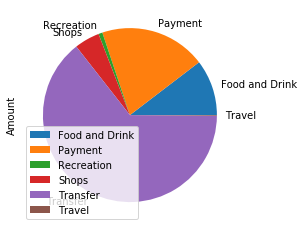

In [64]:
df3.Category.unique()
expenses_category = df3.groupby('Category').agg({"Amount": "sum"})
expenses_category
expenses_category.plot(kind='pie', x='category', y='Amount')

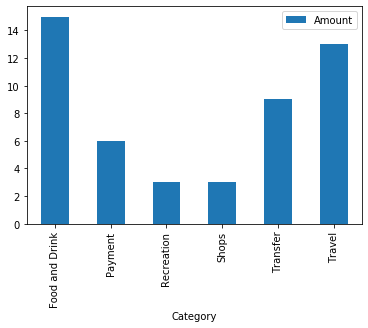

In [65]:

number_transactions = df3.groupby('Category').count().drop(['Name'], axis=1)
number_transactions
number_transactions.plot(kind='bar')

### Calculate the expenses per month

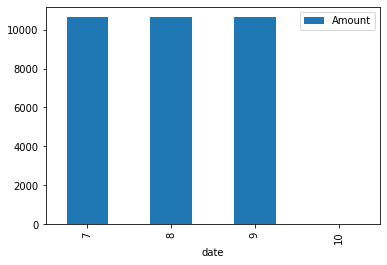

In [69]:
month = df3.groupby(by=[df3.index.month]).agg({"Amount": "sum"})
month.plot(kind="bar")